In [31]:
# STEP 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [32]:
# STEP 2: Load the dataset from Plotly
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

In [33]:
# STEP 3: Handle "missing values" coded as zero
cols_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero_as_missing:
    median = df[col].median()
    df[col] = df[col].replace(0, median)

In [34]:
# STEP 4: Define features and label
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [35]:
# STEP 5: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

In [36]:
# STEP 6: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# STEP 7: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
# STEP 8: Evaluate model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Diabetic", "Diabetic"]))

Model Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.78      0.90      0.84        99
    Diabetic       0.75      0.55      0.63        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



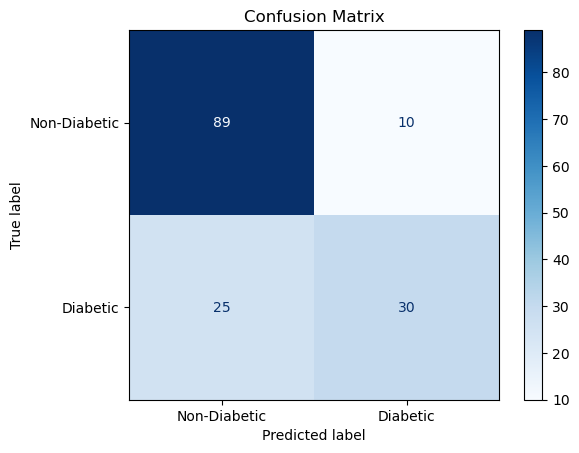

In [39]:
# STEP 9: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetic", "Diabetic"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [40]:
# Step 10: Take user input with ranges

# Get feature ranges from dataset
feature_ranges = {
    col: (df[col].min(), df[col].max())
    for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
}

# User inputs (simpler style, but same output)
Pregnancies = int(input(f"Enter number of pregnancies ({feature_ranges['Pregnancies'][0]} to {feature_ranges['Pregnancies'][1]}): "))
Glucose = float(input(f"Enter glucose level ({feature_ranges['Glucose'][0]} to {feature_ranges['Glucose'][1]}): "))
BloodPressure = float(input(f"Enter blood pressure ({feature_ranges['BloodPressure'][0]} to {feature_ranges['BloodPressure'][1]}): "))
SkinThickness = float(input(f"Enter skin thickness ({feature_ranges['SkinThickness'][0]} to {feature_ranges['SkinThickness'][1]}): "))
Insulin = float(input(f"Enter insulin level ({feature_ranges['Insulin'][0]} to {feature_ranges['Insulin'][1]}): "))
BMI = float(input(f"Enter BMI ({feature_ranges['BMI'][0]} to {feature_ranges['BMI'][1]}): "))
DiabetesPedigreeFunction = float(input(f"Enter diabetes pedigree function ({feature_ranges['DiabetesPedigreeFunction'][0]} to {feature_ranges['DiabetesPedigreeFunction'][1]}): "))
Age = int(input(f"Enter age ({feature_ranges['Age'][0]} to {feature_ranges['Age'][1]}): "))

# Prepare input for prediction with correct feature names
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

user_data_df = pd.DataFrame([[Pregnancies, Glucose, BloodPressure, SkinThickness,
                               Insulin, BMI, DiabetesPedigreeFunction, Age]],
                             columns=columns)

# Scale the input data
user_data_scaled = scaler.transform(user_data_df)

# Prediction
pred = model.predict(user_data_scaled)[0]
print("\nPrediction:", "Diabetic" if pred == 1 else "Non-Diabetic")

Enter number of pregnancies (0 to 17):  9
Enter glucose level (44 to 199):  155
Enter blood pressure (24 to 122):  90
Enter skin thickness (7 to 99):  56
Enter insulin level (14.0 to 846.0):  344
Enter BMI (18.2 to 67.1):  34
Enter diabetes pedigree function (0.078 to 2.42):  0.090
Enter age (21 to 81):  33



Prediction: Diabetic
